In [1]:
import sys
import scanpy as sc 
import numpy as np

sys.path.append('/home/jupyter/data/PlastiNet_v2')

# plotting functions 
from plastinet.data.data_loader import create_data_objects

from plastinet.visualization.plots import plot_continous_obs, plot_tissue, plot_composition_dot_plot, plot_expression

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: 
object has no attribute sparse_csc_tensor:
  File "/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/torch_sparse/tensor.py", line 585
            value = torch.ones(self.nnz(), dtype=dtype, device=self.device())
    
        return torch.sparse_csc_tensor(colptr, row, value, self.sizes())
               ~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE

  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [2]:
# adata = sc.read_h5ad("../multi_radial_adata.h5ad")
# adata

adata = sc.read_h5ad("../../../PDAC/GAT_HMM/Validation_of_GAT/CosMx Intestine/exp_clustered.h5ad")
adata = adata[adata.obs["sample_source"] == "HC_b_"]
# adata = adata[adata.obs["fov"].isin([6, 7])]

In [3]:
adata

View of AnnData object with n_obs × n_vars = 54772 × 980
    obs: 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'sample_source', 'subset', 'fine_type', 'n_genes', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'X', 'Y'
    uns: 'fine_type_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_source_colors', 'subset_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
spatial_coords = np.array([adata.obs["X"], adata.obs["Y"]]).T
adata.obsm["spatial"] = spatial_coords

# adata.obs['X'] = adata.obsm['spatial'][:, 0]  # X coordinate
# adata.obs['Y'] = adata.obsm['spatial'][:, 1]  # Y coordinate
# adata

In [5]:
adata.obs["sample_source"] = [0 for x in adata.obs.index]

In [6]:
# X_min = adata.X.min(axis=0)
# X_max = adata.X.max(axis=0)

# # Avoid division by zero for features where max equals min
# X_range = X_max - X_min
# X_range[X_range == 0] = 1  # Set the range to 1 where the max equals min to prevent division by zero

# # Apply min-max normalization 
# adata.X = (adata.X - X_min) / X_range

In [7]:
# NOTE CHECK 
# check the scale of the different loss components to make sure they are on the same scale 

In [67]:
import importlib
import torch
from torch_geometric.data import DataLoader

from plastinet.models import plastinet_model
from plastinet.data import data_loader, graph_utils

importlib.reload(plastinet_model)
importlib.reload(data_loader)
importlib.reload(graph_utils)

from plastinet.models.plastinet_model import PlastiNet
from plastinet.data.data_loader import create_data_objects
from plastinet.data.graph_utils import graph_alpha, sparse_mx_to_torch_edge_list, graph_to_sparse_matrix

# plastinet = PlastiNet(adata, sample_key="sample_source", radius=10, z_dim=10, epochs=5, spatial_reg=0.2)

plastinet = PlastiNet(adata, sample_key="sample_source", radius=200, z_dim=50, epochs=10, spatial_reg=0.2)

plastinet.run_gat()

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/jupyter/data/PlastiNet_v2/plastinet/models/plastinet_model.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coords = torch.tensor(batch.pos).float().to(self.device)


DGI:  tensor(0.6942, grad_fn=<MulBackward0>)
spatial:  tensor(0.2982, grad_fn=<DivBackward0>)
L1:  tensor(0.3071, grad_fn=<MulBackward0>)
Epoch 0/10, Loss: 1.2995479106903076
DGI:  tensor(0.7415, grad_fn=<MulBackward0>)
spatial:  tensor(0.2778, grad_fn=<DivBackward0>)
L1:  tensor(0.2537, grad_fn=<MulBackward0>)
Epoch 1/10, Loss: 1.2730082273483276
DGI:  tensor(1.0606, grad_fn=<MulBackward0>)
spatial:  tensor(0.2724, grad_fn=<DivBackward0>)
L1:  tensor(0.2069, grad_fn=<MulBackward0>)
Epoch 2/10, Loss: 1.5398718118667603
DGI:  tensor(0.7348, grad_fn=<MulBackward0>)
spatial:  tensor(0.2953, grad_fn=<DivBackward0>)
L1:  tensor(0.1717, grad_fn=<MulBackward0>)
Epoch 3/10, Loss: 1.2018033266067505
DGI:  tensor(0.7119, grad_fn=<MulBackward0>)
spatial:  tensor(0.2992, grad_fn=<DivBackward0>)
L1:  tensor(0.1563, grad_fn=<MulBackward0>)
Epoch 4/10, Loss: 1.1673622131347656
DGI:  tensor(0.7331, grad_fn=<MulBackward0>)
spatial:  tensor(0.2769, grad_fn=<DivBackward0>)
L1:  tensor(0.1415, grad_fn=<Mu

In [19]:
adata

AnnData object with n_obs × n_vars = 54772 × 980
    obs: 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'sample_source', 'subset', 'fine_type', 'n_genes', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'X', 'Y'
    uns: 'fine_type_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_source_colors', 'subset_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [45]:
embedding_adata = plastinet.embedding_adata

In [46]:
embedding_adata

AnnData object with n_obs × n_vars = 54772 × 50
    obs: 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'sample_source', 'subset', 'fine_type', 'n_genes', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'X', 'Y', 'leiden', 'final_avg_pseudotime', 'stem_score'

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


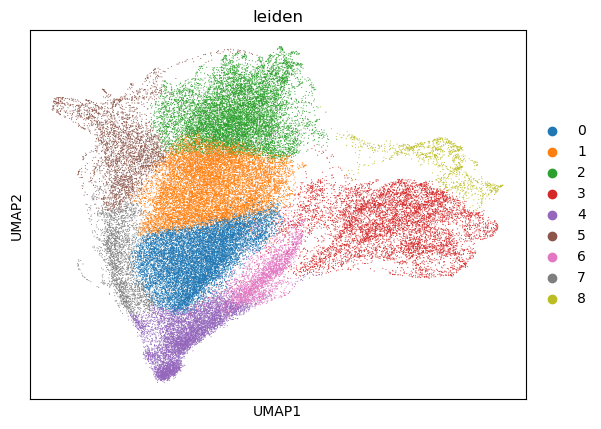

In [49]:
sc.pp.neighbors(embedding_adata, use_rep='X') 
sc.tl.umap(embedding_adata)
sc.tl.leiden(embedding_adata, resolution=0.4)
sc.pl.umap(embedding_adata, color = "leiden")

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


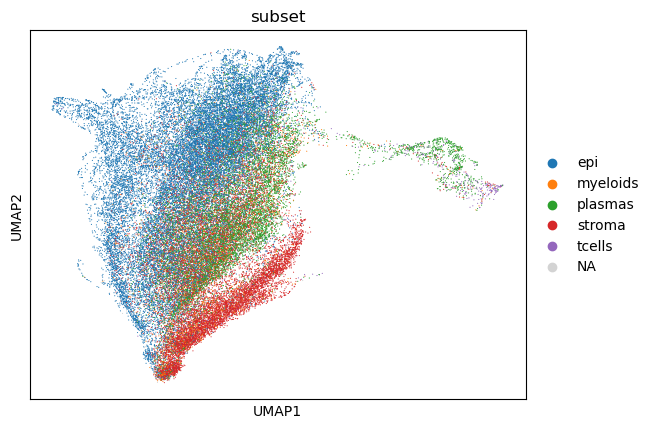

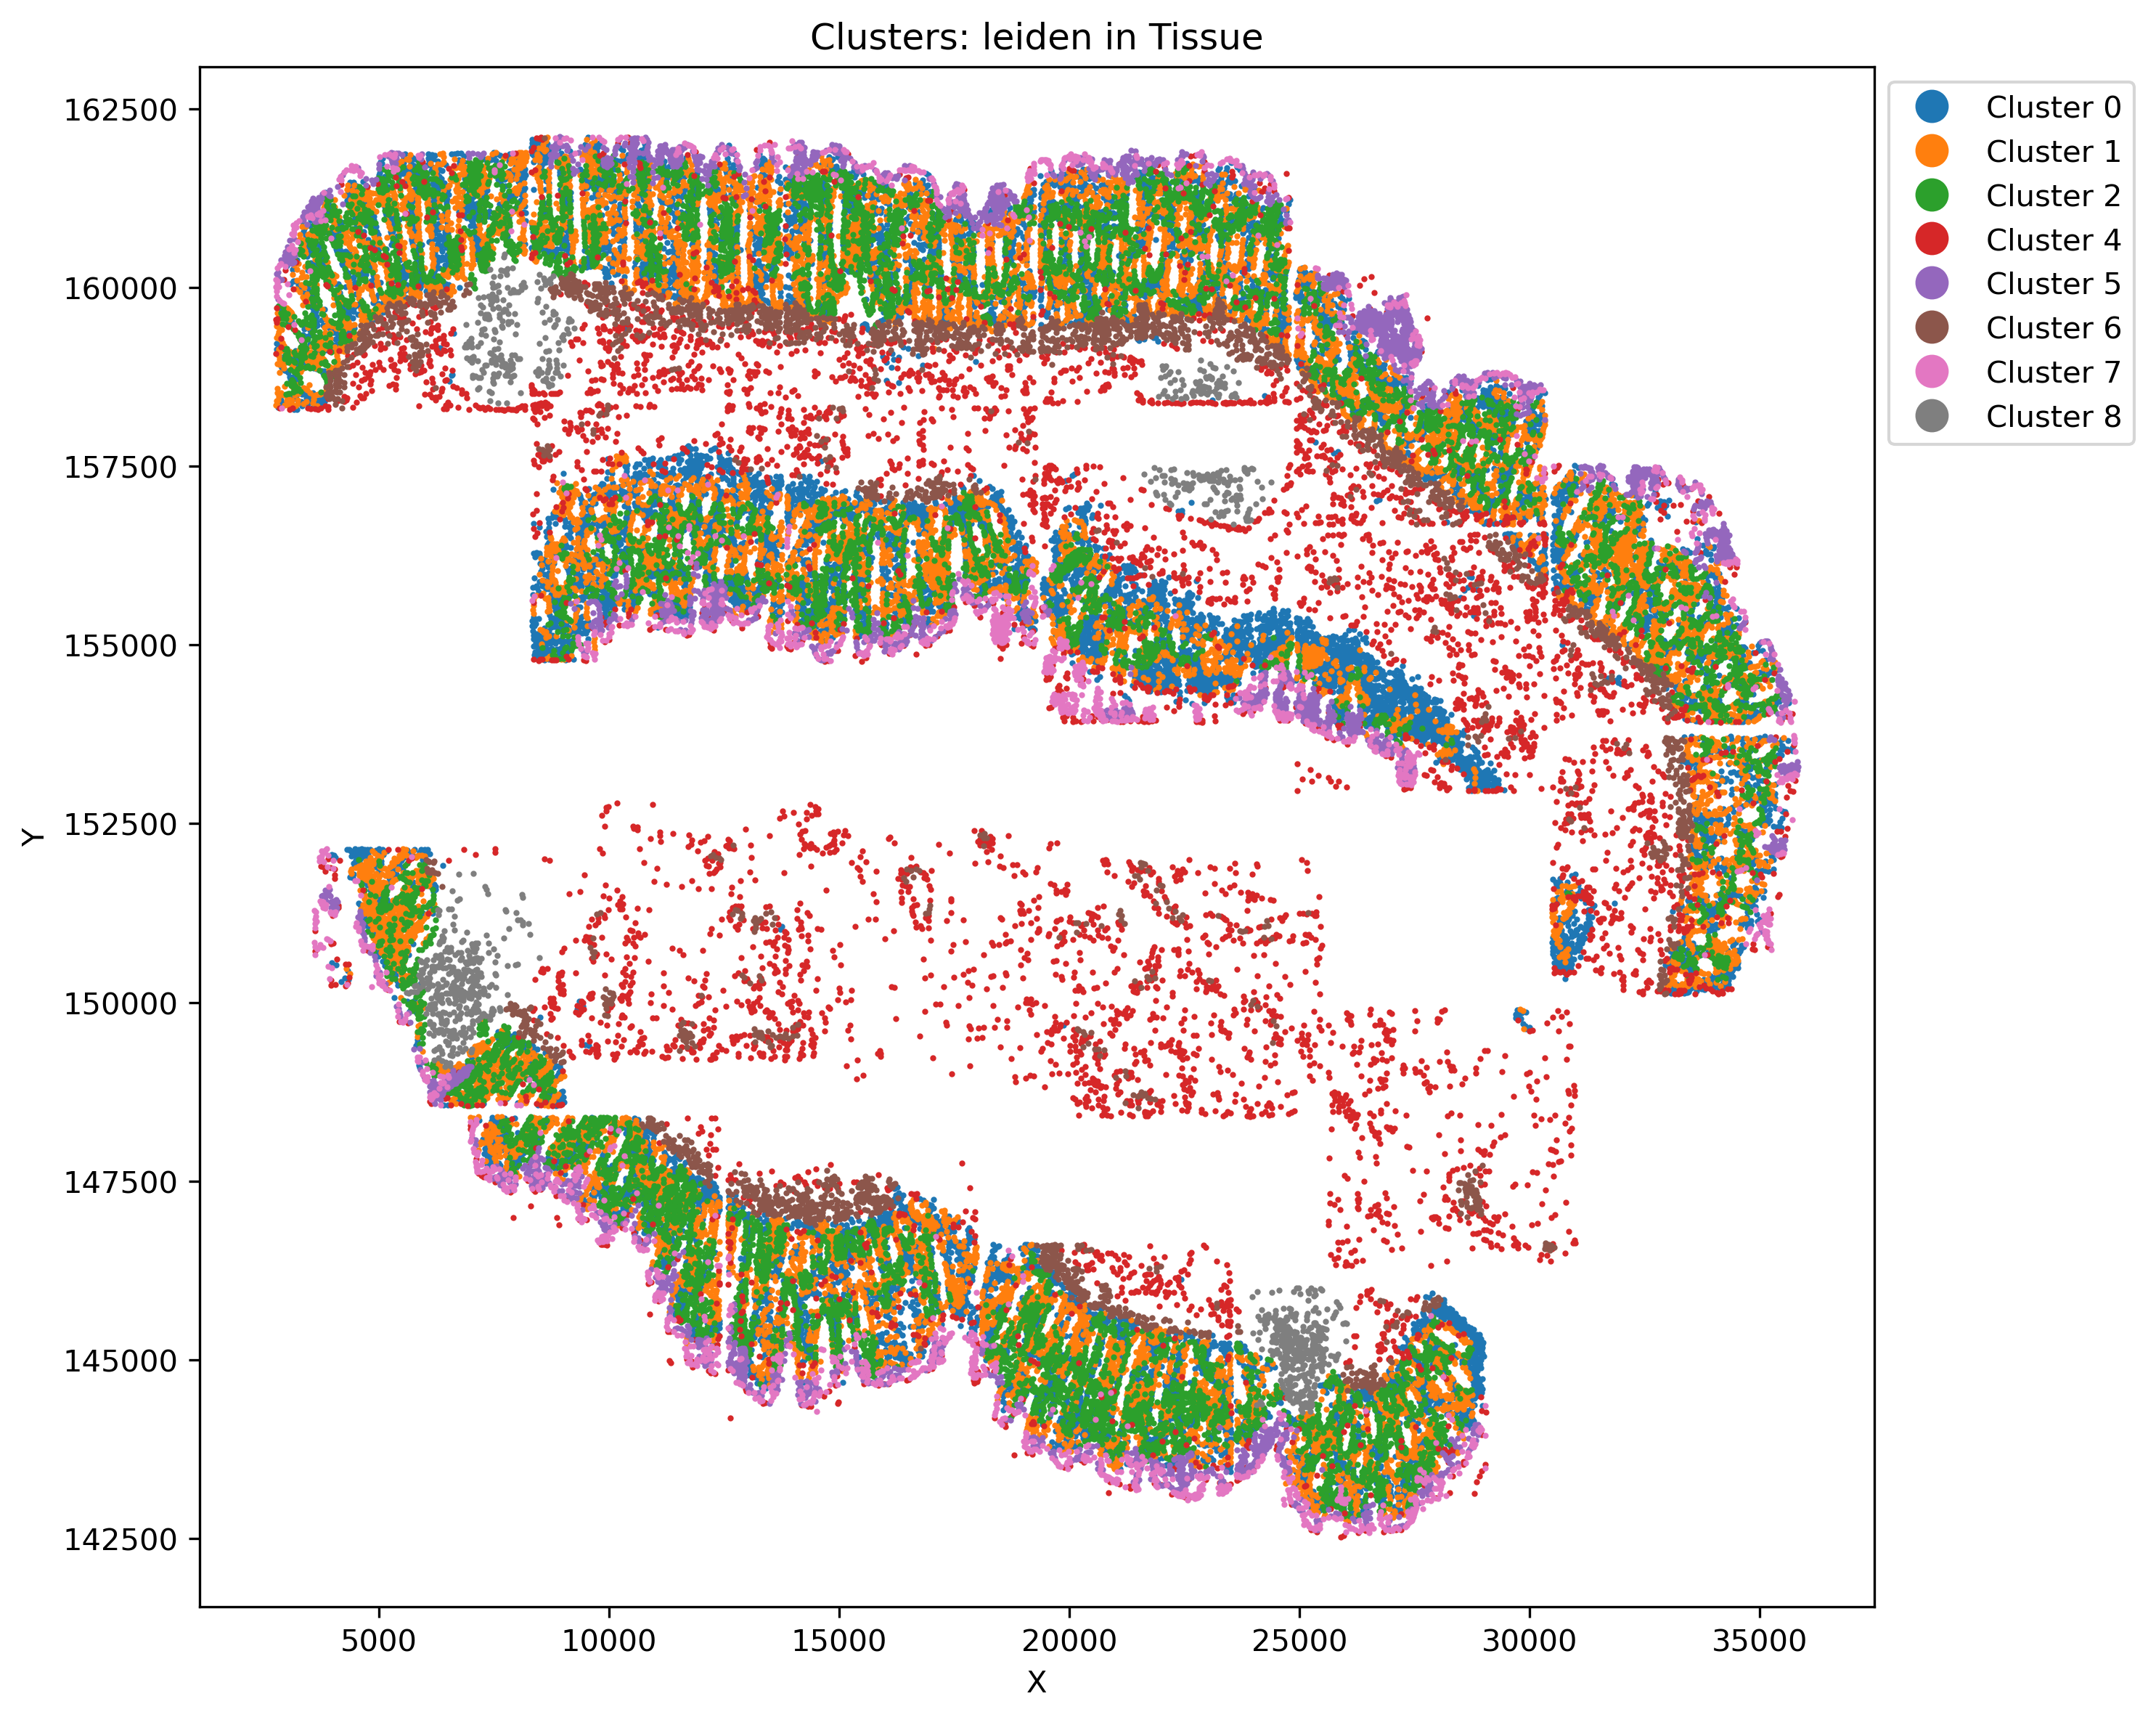

In [68]:
embedding_adata.obs["subset"] = adata.obs["subset"]
sc.pl.umap(embedding_adata, color = "subset")
plot_tissue(embedding_adata, "leiden")

In [15]:
# embedding_adata.obs["subset"] = adata.obs["subset"]
# sc.pl.umap(embedding_adata, color = "subset")

In [69]:
plastinet.neighbor_attn_weights.shape

(54772, 77, 980)

In [70]:
plastinet.self_attn_weights.shape

(54772, 980)

In [71]:
plastinet.reduction_attn_weights.shape

(54772, 980)

(array([[10., 10., 57., ...,  0.,  0.,  0.],
        [ 2.,  5., 70., ...,  0.,  0.,  0.],
        [ 9.,  9., 59., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  6., 69., ...,  0.,  0.,  0.],
        [ 4.,  4., 69., ...,  0.,  0.,  0.],
        [ 1.,  6., 70., ...,  0.,  0.,  0.]]),
 array([0.          , 0.0058683353, 0.0117366705, 0.0176050067,
        0.023473341 , 0.0293416772, 0.0352100134, 0.0410783477,
        0.046946682 , 0.0528150201, 0.0586833544]),
 <a list of 980 BarContainer objects>)

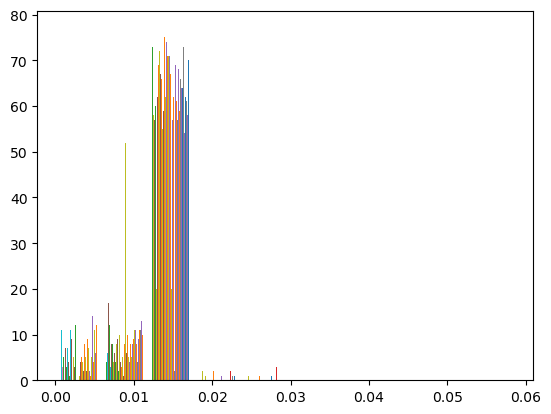

In [72]:
import matplotlib.pyplot as plt

plt.hist(plastinet.neighbor_attn_weights[5])


In [73]:
plastinet.beta

0.2

In [74]:
embedding_adata = embedding_adata[embedding_adata.obs["leiden"] != "3"]

In [75]:
from plastinet.analysis import pseudotime
importlib.reload(pseudotime)


stem_cell_gene_list = ["CD24", "CD44", "EPHB2", "EPHB3", "SOX9", 'ITGA1', 'ITGB1', 'ITGB2', 'ITGAX', 'ITGB4']
pseudotime.construct_differentiation_path(embedding_adata, plastinet.adata, "subset", "epi", stem_cell_gene_list, None, N=5)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


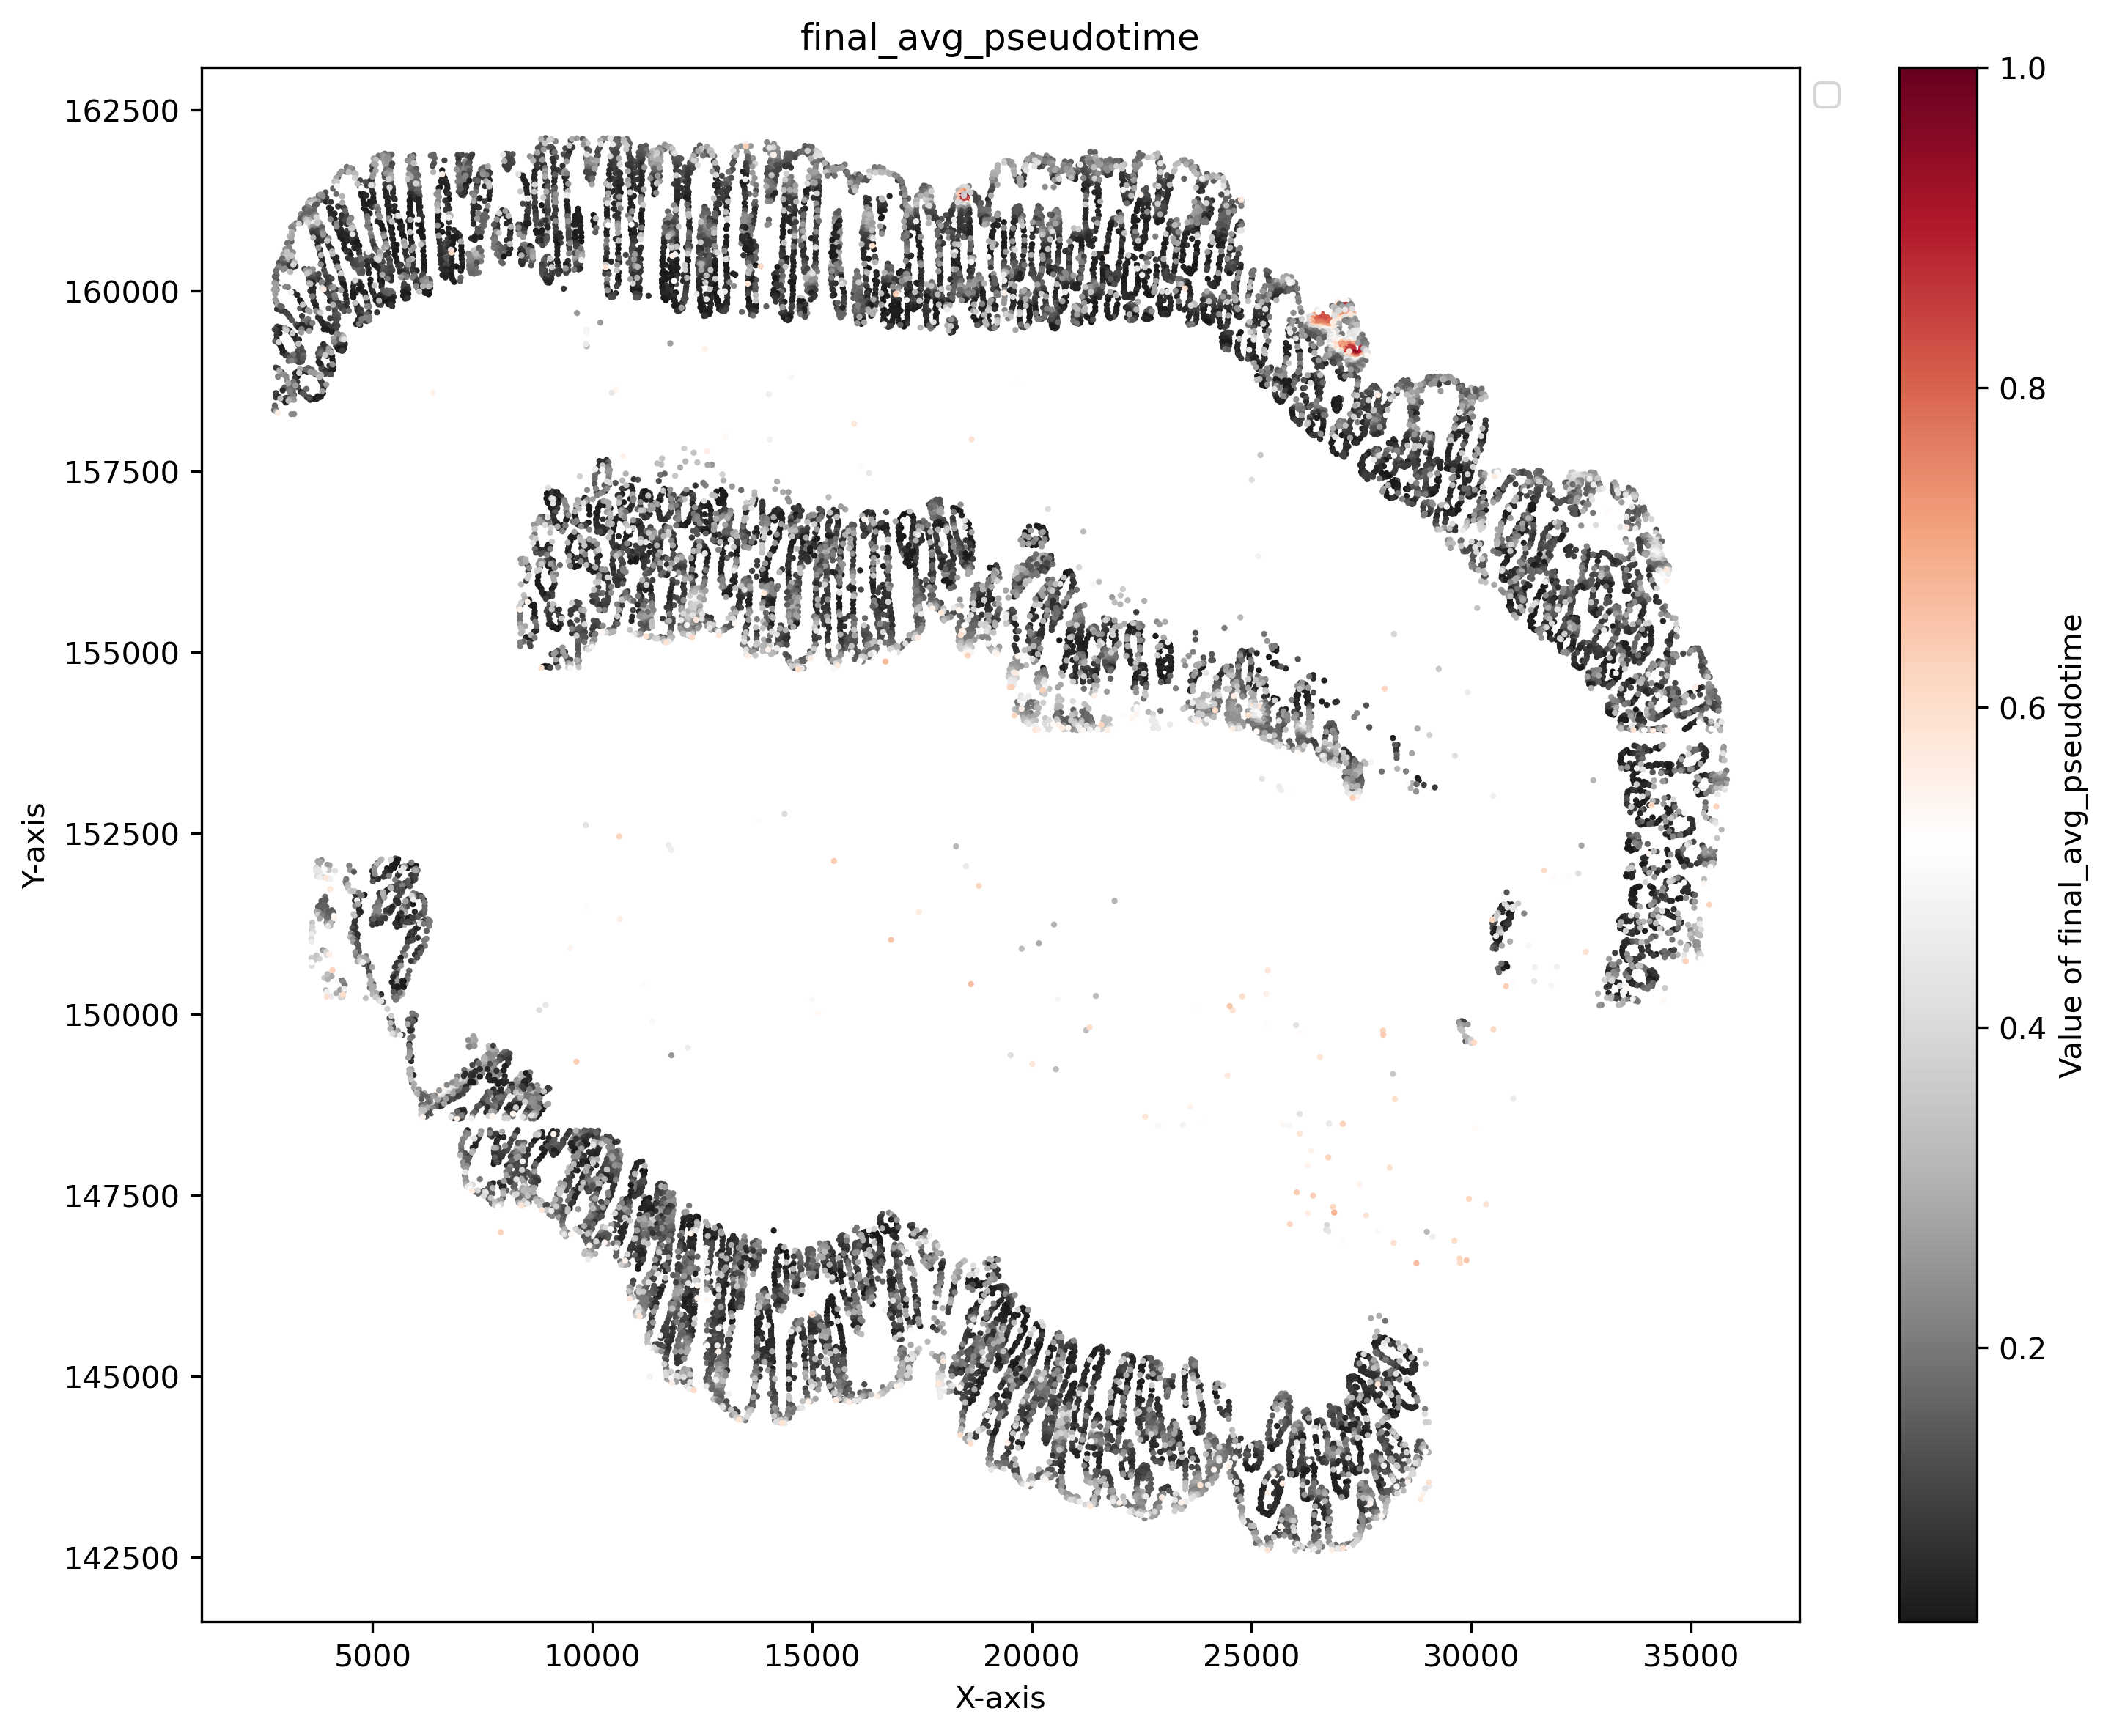

In [58]:
plot_continous_obs(embedding_adata, "final_avg_pseudotime")

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


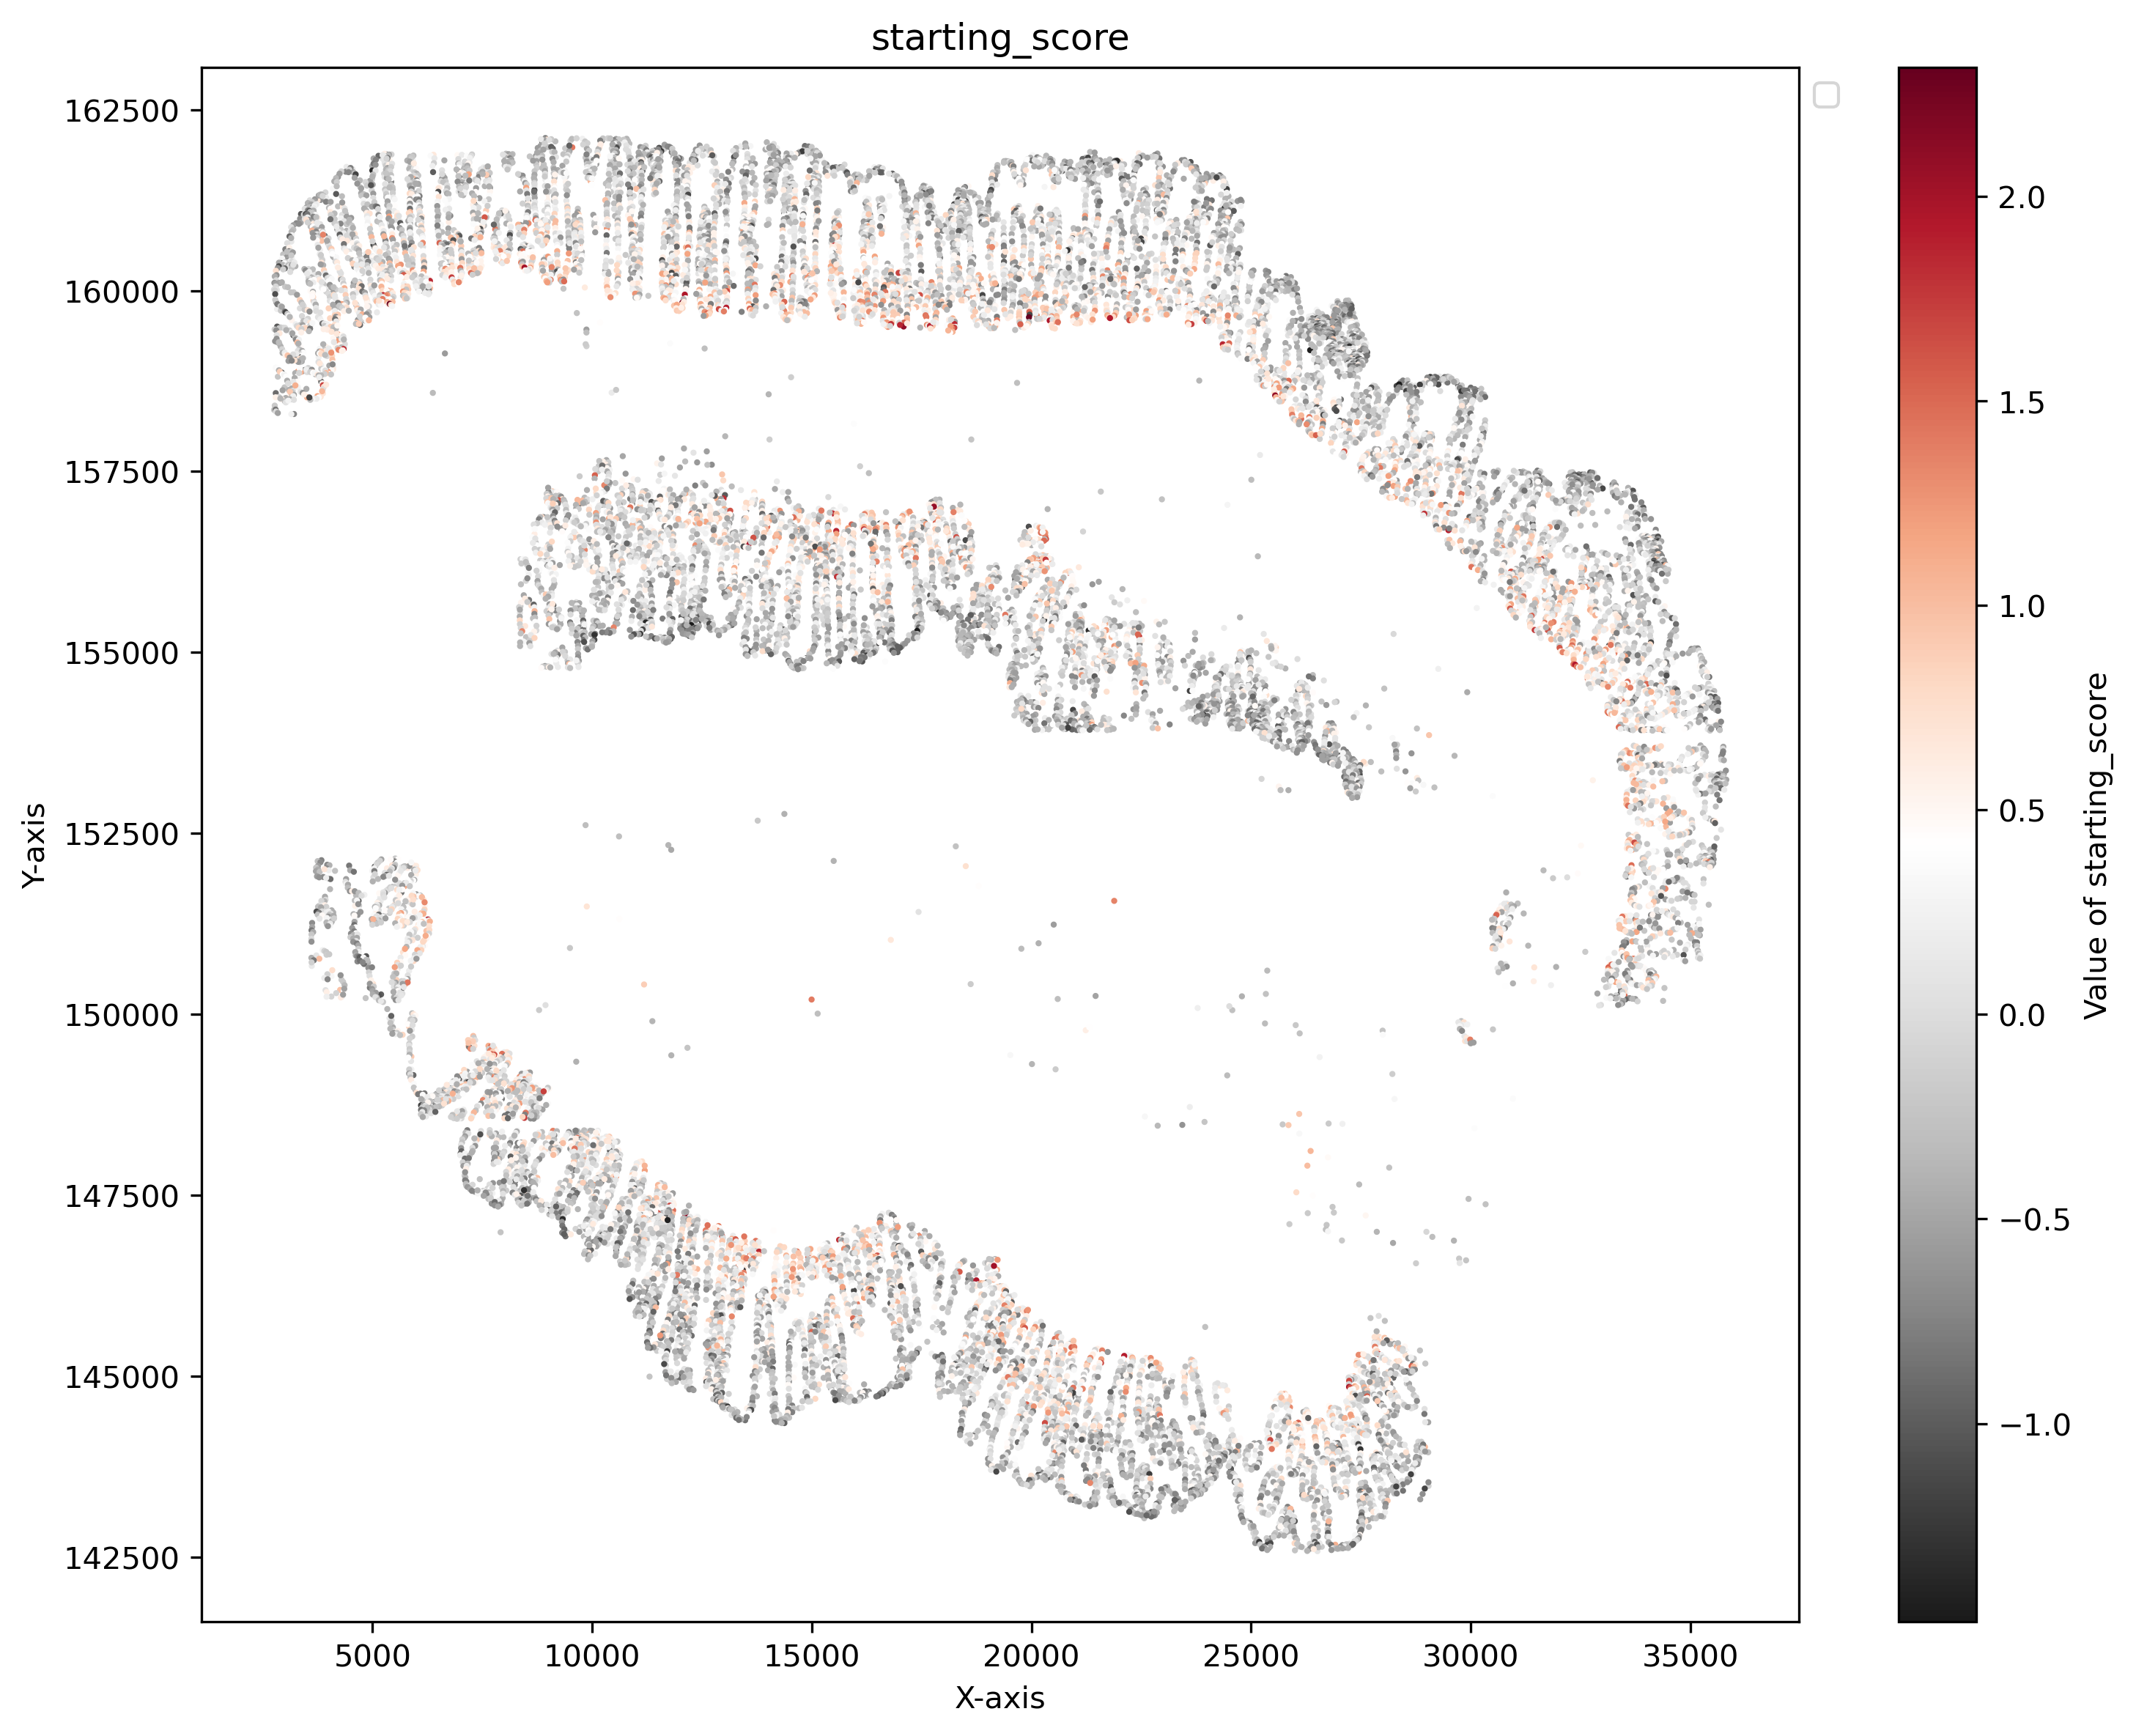

In [40]:
epi = plastinet.adata[plastinet.adata.obs["subset"]=="epi"]
sc.tl.score_genes(epi, stem_cell_gene_list, score_name='starting_score')
plot_continous_obs(epi, "starting_score", size = 1)

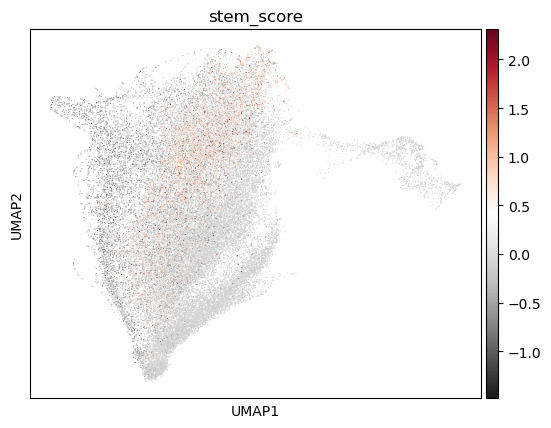

In [59]:
embedding_adata.obs["stem_score"] = epi.obs["starting_score"]
sc.pl.umap(embedding_adata, color = "stem_score", cmap="RdGy_r")

In [80]:
adata.obs.columns

Index(['fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px',
       'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width',
       'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK',
       'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3',
       'Mean.DAPI', 'Max.DAPI', 'sample_source', 'subset', 'fine_type',
       'n_genes', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'X',
       'Y', 'leiden', 'final_avg_pseudotime', 'starting_score'],
      dtype='object')

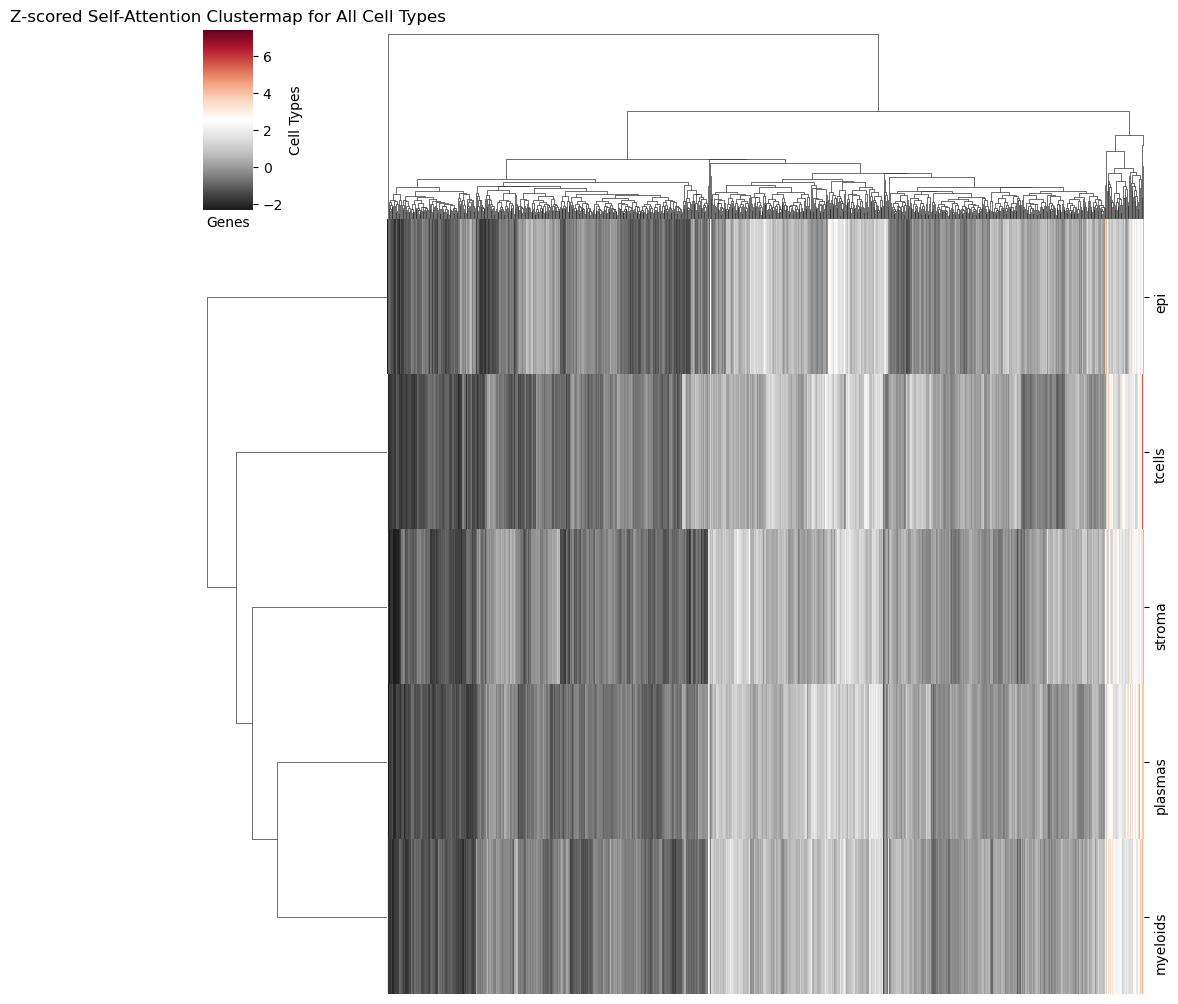

In [60]:
from plastinet.analysis import attention_analysis
importlib.reload(attention_analysis)

top_genes = attention_analysis.analyze_self_attention(plastinet, plastinet.adata, "subset")

In [61]:
top_genes

Top Genes
plasmas   AQP8, IFITM1, GDF9, CCR7, CD36, KRT8, RGS1, HS...
tcells    GDF9, RPL32, IFITM1, SPARCL1, B2M, SELENOP, CD...
myeloids  GDF9, HLA-DPB1, CTNNB1, RPL32, KRT6B, HSPA1A, ...
epi       KRT8, IFITM1, KRT18, CD63, SPARCL1, EZR, UBE2C...
stroma    SOX9, IFITM1, MS4A4A, B2M, GPX3, GDF9, SELENOP...

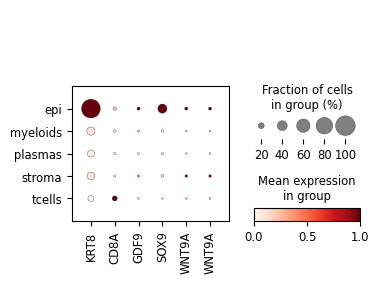

In [66]:
sc.pl.dotplot(adata, ["KRT8", "CD8A", "GDF9", "SOX9", "WNT9A", "WNT9A"], groupby="subset", standard_scale="var")

In [71]:
from plastinet.analysis import attention_analysis
importlib.reload(attention_analysis)

# Convert the AnnData object to PyTorch Geometric Data
data_pyg = attention_analysis.adata_to_pyg_data_with_edges(adata, distance_threshold=200)

# Perform the GATT analysis
att_matrix_dict, correction_matrix_dict = attention_analysis.prep_for_gatt(model=plastinet.model.encoder, data=data_pyg, num_hops=2)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3178/246160655.py", line 5, in <module>
    data_pyg = attention_analysis.adata_to_pyg_data_with_edges(adata, distance_threshold=200)
  File "/home/jupyter/data/PlastiNet_v2/plastinet/analysis/attention_analysis.py", line 76, in adata_to_pyg_data_with_edges
    edge_index = construct_edge_index_from_spatial(adata, distance_threshold=distance_threshold)
  File "/home/jupyter/data/PlastiNet_v2/plastinet/analysis/attention_analysis.py", line 57, in construct_edge_index_from_spatial
    distances = pairwise_distances(spatial_coords)
  File "/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/sklearn/metrics/pairwise.py", line 2196, in pairwise_distances
    return _parallel_pairwise(X, Y, func, n_jobs, **kwds)
  File "/home/jupyter/

In [24]:
data_pyg

Data(x=[54772, 980], edge_index=[2, 1691676], pos=[54772, 2])